In [82]:
# Importing the necessary packages
%matplotlib inline
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.metrics import classification_report
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [83]:
#loading dataset
df = pd.read_csv("Data_for_UCI_named.csv", low_memory=False)
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [84]:
df.tail()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,0.023892,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,-0.025803,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,-0.031810,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,0.037789,unstable
9999,6.530527,6.781790,4.349695,8.673138,3.492807,-1.390285,-1.532193,-0.570329,0.073056,0.505441,0.378761,0.942631,0.045263,unstable


In [85]:
df.shape

(10000, 14)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
tau1     10000 non-null float64
tau2     10000 non-null float64
tau3     10000 non-null float64
tau4     10000 non-null float64
p1       10000 non-null float64
p2       10000 non-null float64
p3       10000 non-null float64
p4       10000 non-null float64
g1       10000 non-null float64
g2       10000 non-null float64
g3       10000 non-null float64
g4       10000 non-null float64
stab     10000 non-null float64
stabf    10000 non-null object
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [87]:
#Confirming for missing values
df.isnull().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [88]:
#Dropping the stab column
df.drop('stab', inplace=True, axis = 1)

In [89]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable


In [90]:
#Counting the number of stable and unstable in the stabf column
df["stabf"].value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [91]:
#Seperating the X and Y features
X = df.drop(columns='stabf')
y = df['stabf']

In [92]:
#splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
y_train.value_counts()

unstable    5092
stable      2908
Name: stabf, dtype: int64

In [93]:
# Scaling the dataset using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_trained_scaled = scaler.fit_transform(x_train)

x_test_scaled = scaler.transform(x_test)

x_trained_scaled

array([[ 0.36732671, -0.98604156,  0.65044706, ...,  0.33985949,
         0.58556788,  0.49223946],
       [-0.06465869,  0.08943734,  1.03507899, ..., -1.5584875 ,
         1.42964862, -1.44352101],
       [-1.46785   ,  1.29841758, -0.50253617, ...,  1.45153362,
        -1.04574277,  0.49248925],
       ...,
       [ 0.65760851, -0.72275633, -1.4058879 , ...,  0.29310048,
        -1.55058661,  0.81034412],
       [-0.05931596, -1.26053241, -1.01047147, ..., -0.38825455,
        -0.72678059,  1.66791568],
       [-1.47321368,  0.63843757,  0.25012249, ..., -1.17410957,
         1.179282  ,  0.78362657]])

In [94]:
#Model Building and Evaluation using RandomForest and Extra trees classifier
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=1)
rf_clf.fit(x_trained_scaled, y_train)
y_predict_rf = rf_clf.predict(x_test_scaled)

In [95]:
print(classification_report(y_test, y_predict_rf, digits=4))

              precision    recall  f1-score   support

      stable     0.8239    0.8806    0.8513       712
    unstable     0.9314    0.8960    0.9133      1288

    accuracy                         0.8905      2000
   macro avg     0.8777    0.8883    0.8823      2000
weighted avg     0.8931    0.8905    0.8913      2000



In [96]:
#extra tree classifier
from sklearn.ensemble import ExtraTreesClassifier
x_tree = ExtraTreesClassifier(random_state=1)
x_tree.fit(x_trained_scaled, y_train)
x_tree_predict = x_tree.predict(x_test_scaled)

In [97]:
print(classification_report(y_test, x_tree_predict, digits=4))

              precision    recall  f1-score   support

      stable     0.8386    0.8610    0.8496       712
    unstable     0.9220    0.9084    0.9151      1288

    accuracy                         0.8915      2000
   macro avg     0.8803    0.8847    0.8824      2000
weighted avg     0.8923    0.8915    0.8918      2000



In [98]:
# Xgboost classifier
from xgboost import XGBRFClassifier
xtreme = XGBRFClassifier(max_depth=3,learning_rate=0.1, random_state=1)
xtreme.fit(x_trained_scaled, y_train)
xtreme_pred = xtreme.predict(x_test_scaled)

In [99]:
print(classification_report(y_test, xtreme_pred, digits=4))

              precision    recall  f1-score   support

      stable     0.8398    0.5815    0.6871       712
    unstable     0.8023    0.9387    0.8651      1288

    accuracy                         0.8115      2000
   macro avg     0.8210    0.7601    0.7761      2000
weighted avg     0.8156    0.8115    0.8018      2000



In [100]:
#Lightgbm
from lightgbm import LGBMClassifier
light_gbm = LGBMClassifier(random_state=1)
light_gbm.fit(x_trained_scaled, y_train)
light_gbm_pred = light_gbm.predict(x_test_scaled)

In [101]:
print(classification_report(y_test, light_gbm_pred, digits=4))

              precision    recall  f1-score   support

      stable     0.9297    0.8919    0.9104       712
    unstable     0.9415    0.9627    0.9520      1288

    accuracy                         0.9375      2000
   macro avg     0.9356    0.9273    0.9312      2000
weighted avg     0.9373    0.9375    0.9372      2000



In [102]:
n_estimators = [50, 100, 300, 500, 1000]
min_samples_split = [2, 3, 5, 7, 9]
min_samples_leaf = [1, 2, 4, 6, 8]
max_features = ['auto', 'sqrt', 'log2', None] 
hyperparameter_grid = {'n_estimators': n_estimators,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

In [103]:
from sklearn.model_selection import RandomizedSearchCV
clfier = RandomizedSearchCV(tree, hyperparameter_grid, random_state=1)
search_CV = clfier.fit(x_trained_scaled, y_train)

In [104]:
search_CV.best_params_.values()

dict_values([1000, 2, 8, None])

[0.12083667 0.11800431 0.11407464 0.11509866 0.03978093 0.04059548
 0.03837752 0.03870947 0.09059788 0.09416302 0.10124565 0.08851576]


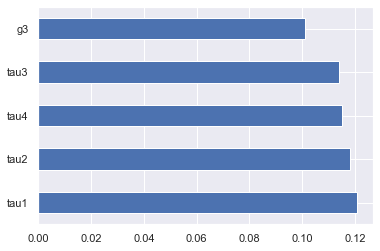

In [105]:
from sklearn.ensemble import ExtraTreesClassifier
final_model = ExtraTreesClassifier()
final_model.fit(X,y)
print(final_model.feature_importances_)
#Using matplotlib to plot graph of feature importance 
featre_importances = pd.Series(final_model.feature_importances_, index=X.columns)
featre_importances.nlargest().plot(kind='barh')
plt.show()